# Water Quality Assessment using KNN

### Import Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('water_data.csv')

In [62]:
data.head()

,Unnamed: 0,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target_Class
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.22683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,1
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.19007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,1
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,3.19956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,1.66319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,1
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.04867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,1


In [63]:
data.tail()

,Unnamed: 0,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target_Class
99996,99996,8.818809,0.000075,5.491966,NaN,1.018468e-16,0.054606,Light Yellow,6.18404,1.517286,...,2.479101,0.006608,441.819671,River,20.007815,69.299508,August,8.0,22.0,0
99997,99997,7.277367,0.000022,2.878326,126.880370,1.965436e-22,3.632629,Colorless,2.91402,0.228949,...,3.315341,0.001116,308.963907,Aquifer,6.787200,70.198798,January,27.0,14.0,1
99998,99998,7.000954,0.012017,4.157934,165.559327,5.501361e-126,2.162606,Faint Yellow,0.55013,0.275803,...,3.457473,0.010697,236.960240,Lake,12.707579,46.856938,December,17.0,1.0,1
99999,99999,8.374296,0.134012,2.631553,148.166082,3.845744e-40,0.251668,Colorless,4.06297,0.458973,...,2.603017,0.000242,405.005236,Lake,20.841677,55.109951,NaN,11.0,3.0,1
100000,100000,7.154356,0.092041,5.656341,212.623606,3.102165e-72,2.462944,Colorless,0.00355,0.962474,...,2.907079,0.023063,409.911033,Well,4.789358,33.621950,January,16.0,22.0,1


In [64]:
data.shape

(100001, 24)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100001 non-null  int64  
 1   pH                      98096 non-null   float64
 2   Iron                    99342 non-null   float64
 3   Nitrate                 98242 non-null   float64
 4   Chloride                97054 non-null   float64
 5   Lead                    99553 non-null   float64
 6   Zinc                    97387 non-null   float64
 7   Color                   99910 non-null   object 
 8   Turbidity               99186 non-null   float64
 9   Fluoride                96750 non-null   float64
 10  Copper                  96662 non-null   float64
 11  Odor                    97015 non-null   float64
 12  Sulfate                 96635 non-null   float64
 13  Conductivity            97267 non-null   float64
 14  Chlorine            

In [66]:
data.describe()

,Unnamed: 0,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target_Class
count,100001.000000,98096.000000,9.934200e+04,98242.000000,97054.000000,9.955300e+04,97387.000000,99186.000000,96750.000000,9.666200e+04,...,96635.000000,97267.000000,99057.000000,9.815200e+04,99976.000000,97170.000000,99467.000000,98317.000000,98154.000000,100001.000000
mean,50000.000000,7.465820,7.063514e-02,5.778242,174.085913,5.767344e-04,1.453518,3.692642,0.864798,4.248778e-01,...,139.499254,425.335535,3.177733,4.508899e-02,256.631253,19.205925,59.956199,15.732325,11.478177,0.679833
std,28867.946472,0.702666,3.101010e-01,2.644179,55.831713,1.992903e-02,1.367163,6.234714,0.672095,4.471878e-01,...,58.936932,189.214918,0.648524,2.965350e-01,149.048334,11.349848,18.085812,8.807799,6.946506,0.466543
min,0.000000,2.433522,7.448581e-40,0.480498,37.418247,0.000000e+00,0.000005,0.000000,0.000071,4.438111e-08,...,16.164578,18.702267,1.065086,4.074549e-46,0.010643,1.558907,-14.794843,1.000000,0.000000,0.000000
25%,25000.000000,6.976616,6.807521e-06,3.890731,135.139803,6.028363e-124,0.399269,0.321275,0.358390,1.191108e-01,...,96.218793,286.998201,2.720986,1.158528e-06,128.058177,11.400262,47.759298,8.000000,5.000000,0.000000
50%,50000.000000,7.463443,1.556480e-03,5.439880,170.625235,1.650975e-63,1.049581,1.732580,0.734768,3.147735e-01,...,131.754309,398.504507,3.166718,3.058186e-04,255.997346,16.540677,59.908517,16.000000,11.000000,1.000000
75%,75000.000000,7.963269,3.729389e-02,7.325300,208.530120,9.764547e-28,2.146063,5.060702,1.241864,6.184055e-01,...,175.883430,534.341865,3.627716,7.766188e-03,383.516805,23.942777,72.194840,23.000000,18.000000,1.000000
max,100000.000000,12.040008,1.124382e+01,48.337580,853.229772,2.796741e+00,19.179677,153.096850,9.758040,1.118297e+01,...,1279.553774,1688.540980,9.491165,1.474090e+01,579.777639,159.547188,131.888212,31.000000,23.000000,1.000000


In [67]:
data = data.drop([cols for cols in data.columns if cols not in ['pH', 'Turbidity', 'Total Dissolved Solids', 'Target_Class']], axis=1)

In [68]:
data

,pH,Turbidity,Total Dissolved Solids,Target_Class
0,8.332988,0.22683,332.118789,1
1,6.917863,0.19007,284.641984,1
2,5.443762,3.19956,570.054094,0
3,7.955339,1.66319,100.043838,1
4,8.091909,0.04867,168.075545,1
...,...,...,...,...
99996,8.818809,6.18404,441.819671,0
99997,7.277367,2.91402,308.963907,1
99998,7.000954,0.55013,236.960240,1
99999,8.374296,4.06297,405.005236,1


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      98096 non-null   float64
 1   Turbidity               99186 non-null   float64
 2   Total Dissolved Solids  99976 non-null   float64
 3   Target_Class            100001 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.1 MB


There are missing values in pH, Turbidity and TDS

### Handling Missing values

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data.iloc[:,:3] = imputer.fit_transform(data.iloc[:,:3])

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      100001 non-null  float64
 1   Turbidity               100001 non-null  float64
 2   Total Dissolved Solids  100001 non-null  float64
 3   Target_Class            100001 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.1 MB


### Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,:3] = scaler.fit_transform(data.iloc[:,:3])

In [73]:
print(data)

              pH  Turbidity  Total Dissolved Solids  Target_Class
0       1.246042  -0.558171                0.506529             1
1      -0.787365  -0.564092                0.187955             1
2      -2.905515  -0.079411                2.103100             0
3       0.703394  -0.326845               -1.050718             1
4       0.899633  -0.586864               -0.594218             1
...          ...        ...                     ...           ...
99996   1.944123   0.401241                1.242634             0
99997  -0.270790  -0.125398                0.351158             1
99998  -0.667971  -0.506104               -0.131995             1
99999   1.305398   0.059642                0.995605             1
100000 -0.447546  -0.594131                1.028523             1

[100001 rows x 4 columns]


### Splitting data into input and output features

In [74]:
X = data.iloc[:,:3] # input features
Y = data['Target_Class'] # output feature

In [75]:
X

,pH,Turbidity,Total Dissolved Solids
0,1.246042,-0.558171,0.506529
1,-0.787365,-0.564092,0.187955
2,-2.905515,-0.079411,2.103100
3,0.703394,-0.326845,-1.050718
4,0.899633,-0.586864,-0.594218
...,...,...,...
99996,1.944123,0.401241,1.242634
99997,-0.270790,-0.125398,0.351158
99998,-0.667971,-0.506104,-0.131995
99999,1.305398,0.059642,0.995605


In [76]:
Y

0         1
1         1
2         0
3         1
4         1
         ..
99996     0
99997     1
99998     1
99999     1
100000    1
Name: Target_Class, Length: 100001, dtype: int64

### Splitting data into Training and Testing

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [78]:
X_train.shape

(80000, 3)

In [79]:
y_train.value_counts()

Target_Class
1    54452
0    25548
Name: count, dtype: int64

### Fit data into model

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### Predict test results

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of model', round(accuracy*100, 2))

[[ 6089   380]
 [  224 13308]]
Accuracy of model 96.98


### Classification report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6469
           1       0.97      0.98      0.98     13532

    accuracy                           0.97     20001
   macro avg       0.97      0.96      0.97     20001
weighted avg       0.97      0.97      0.97     20001



### Cross-validation to get optimal k value

In [83]:
from sklearn.model_selection import cross_val_score
list_k = list(range(1,50))

cv_scores = []

for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

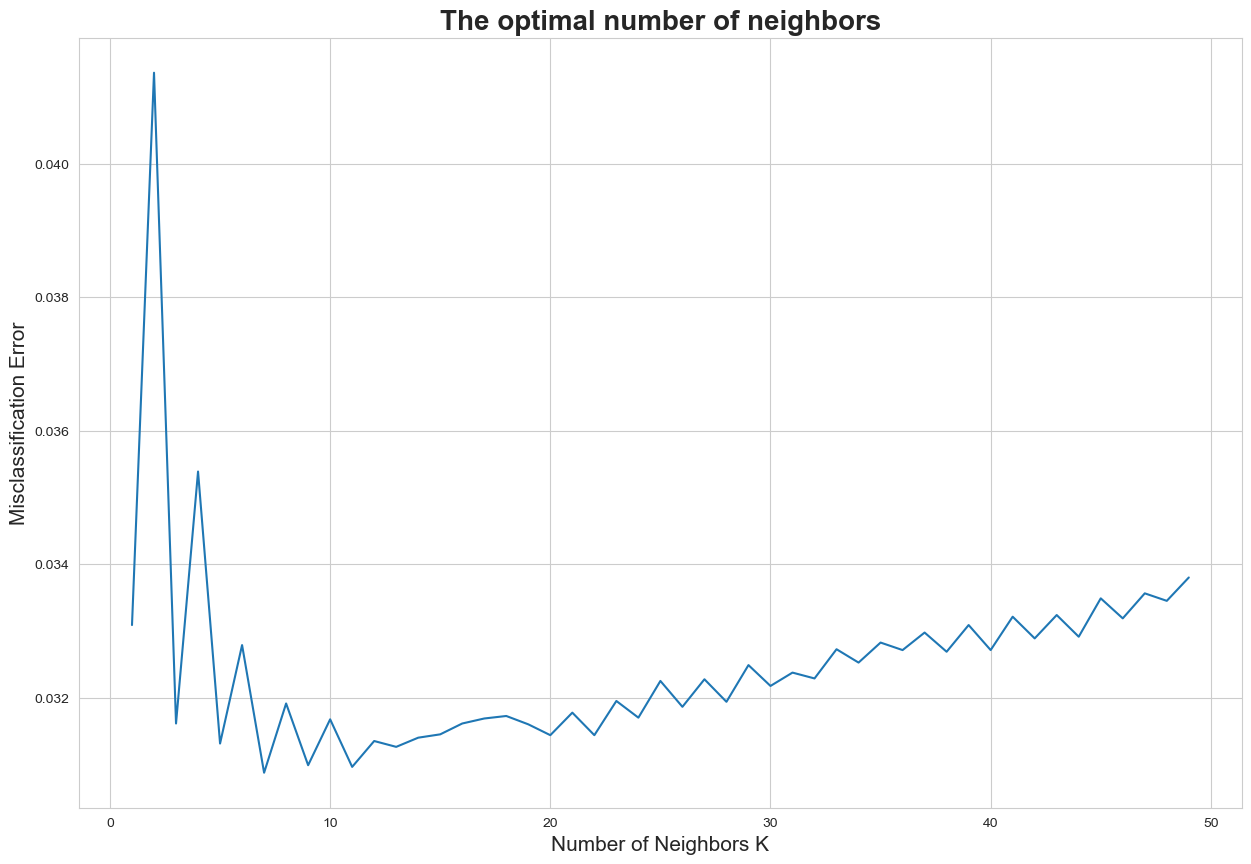

Optimal k value: 7


In [84]:
import seaborn as sns

MSE = [1-x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(list_k, MSE)

plt.show()
optimal_k = list_k[MSE.index(min(MSE))]
optimal_mse = min(MSE)  

print(f"Optimal k value: {optimal_k}")

### Test for unseen data

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = pd.DataFrame({
    'pH': [7.8],  
    'Turbidity': [3.4],  
    'Total Dissolved Solids': [350]  
})
new_data_scaled = scaler.fit_transform(new_data)
predictions = knn.predict(new_data_scaled)

print("Predictions for new data:", predictions)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.